<a href="https://colab.research.google.com/github/gianiarda/latihan1/blob/main/latihan1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing Modules untuk Notebook ini
import warnings; warnings.simplefilter('ignore')
import matplotlib.pyplot as plt, seaborn as sns, numpy as np
sns.set(style="ticks", color_codes=True)

"Done"

'Done'

#SVD

In [3]:
# Singular-value decomposition
from scipy.linalg import svd
# define a matrix
A = np.array([[1, 2], [3, 4], [5, 6]])
print(A)
# SVD
U, s, VT = svd(A)
print(U)
print(s)
print(VT)

[[1 2]
 [3 4]
 [5 6]]
[[-0.2298477   0.88346102  0.40824829]
 [-0.52474482  0.24078249 -0.81649658]
 [-0.81964194 -0.40189603  0.40824829]]
[9.52551809 0.51430058]
[[-0.61962948 -0.78489445]
 [-0.78489445  0.61962948]]


In [4]:
# Reconstruct SVD
from numpy import dot

# define a matrix
A = np.array([[1, 2], [3, 4], [5, 6]])
print(A)
# Singular-value decomposition
U, s, VT = svd(A)
# create m x n Sigma matrix
Sigma = np.zeros((A.shape[0], A.shape[1])) # Sigma Tidak SQUARE
# populate Sigma with n x n diagonal matrix
Sigma[:A.shape[1], :A.shape[1]] = np.diag(s)
# reconstruct matrix
B = U.dot(Sigma.dot(VT))
print(B)

[[1 2]
 [3 4]
 [5 6]]
[[1. 2.]
 [3. 4.]
 [5. 6.]]


In [5]:
Sigma

array([[9.52551809, 0.        ],
       [0.        , 0.51430058],
       [0.        , 0.        ]])

#SVD untuk Reduksi Dimensi

In [26]:
A = np.array([
    [1,2,3,4,5,6,7,8,9,10],
    [11,12,13,14,15,16,17,18,19,20],
    [21,22,23,24,25,26,27,28,29,30]])
print(A)
# Singular-value decomposition
U, s, VT = svd(A)
# create m x n Sigma matrix
Sigma = np.zeros((A.shape[0], A.shape[1]))
# populate Sigma with n x n diagonal matrix
Sigma[:A.shape[0], :A.shape[0]] = np.diag(s)
# select
n_elements = 2
Sigma = Sigma[:, :n_elements]
VT = VT[:n_elements, :]
# reconstruct
B = U.dot(Sigma.dot(VT))
print(B)
# transform
T = U.dot(Sigma)
print(T)
T = A.dot(VT.T)
print(T)

[[ 1  2  3  4  5  6  7  8  9 10]
 [11 12 13 14 15 16 17 18 19 20]
 [21 22 23 24 25 26 27 28 29 30]]
[[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [11. 12. 13. 14. 15. 16. 17. 18. 19. 20.]
 [21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]]
[[-18.52157747   6.47697214]
 [-49.81310011   1.91182038]
 [-81.10462276  -2.65333138]]
[[-18.52157747   6.47697214]
 [-49.81310011   1.91182038]
 [-81.10462276  -2.65333138]]


In [30]:
from sklearn.decomposition import TruncatedSVD
# define array
from numpy import array
A = array([
    [1,2,3,4,5,6,7,8,9,10],
    [11,12,13,14,15,16,17,18,19,20],
    [21,22,23,24,25,26,27,28,29,30]])
print(A)
print("Ukuran A = ", A.shape)
# svd
svd = TruncatedSVD(n_components=2)
svd.fit(A)
result = svd.transform(A)
print(result)
print("Ukuran Truncated A = ", result.shape)

[[ 1  2  3  4  5  6  7  8  9 10]
 [11 12 13 14 15 16 17 18 19 20]
 [21 22 23 24 25 26 27 28 29 30]]
Ukuran A =  (3, 10)
[[18.52157747  6.47697214]
 [49.81310011  1.91182038]
 [81.10462276 -2.65333138]]
Ukuran Truncated A =  (3, 2)


#**Topic Modelling**
sumber: Matrix Factorization (C) Taufik Sutanto - 2021 tau-data Indonesia ~ 
https://tau-data.id/rng/




In [6]:
# Data sederhana yang akan dilakukan adalah 9 judul buku ini
d1 = "The Neatest Little Guide to Stock Market Investing"
d2 = "Investing For Dummies, 4th Edition"
d3 = "The Little Book of Common Sense Investing: The Only Way to Guarantee Your Fair Share of Stock Market Returns"
d4 = "The Little Book of Value Investing"
d5 = "Value Investing: From Graham to Buffett and Beyond"
d6 = "Rich Dad's Guide to Investing: What the Rich Invest in, That the Poor and the Middle Class Do Not!"
d7 = "Investing in Real Estate, 5th Edition"
d8 = "Stock Investing For Dummies"
d9 = "Rich Dad's Advisors: The ABC’s of Real Estate Investing: The Secrets of Finding Hidden Profits Most Investors Miss"
# Data adalah kumpulan dokumen sehingga
D = [d1, d2, d3, d4, d5, d6, d7, d8, d9]

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

vsm = CountVectorizer(binary = False, lowercase=True, stop_words='english')
A = vsm.fit_transform(D)

A.shape

(9, 37)

In [8]:
type(A)

scipy.sparse.csr.csr_matrix

In [10]:
A.toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
        0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0

In [11]:
print(str(vsm.vocabulary_)[:93])

{'neatest': 25, 'little': 21, 'guide': 16, 'stock': 34, 'market': 22, 'investing': 19, 'dummi


In [12]:
# Solve dengan Numpy
U, s, V = np.linalg.svd(A.toarray())
print("ukuran-ukuran matriks = ",U.shape, s.shape, V.shape)
print(s)

ukuran-ukuran matriks =  (9, 9) (9,) (37, 37)
[4.54521696 3.66729152 2.87340127 2.52846421 2.0056327  1.90952942
 1.65889315 1.33047338 1.02540653]


In [17]:
# Mari kita plot hasil diatas

x_kata = V[0,:] # Baris pertama matrix V = sumbu x kata
y_kata = V[1,:] # Baris kedua matrix V = sumbu y kata

# label dari setiap barisnya = kata-kata
# kita akan gunakan perintah yang sama dengan di segmen sebelum ini
print(vsm.vocabulary_)

{'neatest': 25, 'little': 21, 'guide': 16, 'stock': 34, 'market': 22, 'investing': 19, 'dummies': 9, '4th': 0, 'edition': 10, 'book': 4, 'common': 7, 'sense': 32, 'way': 36, 'guarantee': 15, 'fair': 12, 'share': 33, 'returns': 29, 'value': 35, 'graham': 14, 'buffett': 5, 'rich': 30, 'dad': 8, 'invest': 18, 'poor': 26, 'middle': 23, 'class': 6, 'real': 28, 'estate': 11, '5th': 1, 'advisors': 3, 'abc': 2, 'secrets': 31, 'finding': 13, 'hidden': 17, 'profits': 27, 'investors': 20, 'miss': 24}


In [18]:
idx_kata = dict(map(reversed, vsm.vocabulary_.items()))
Label = [idx_kata[i] for i in range(A.shape[0])]
print(Label)

['4th', '5th', 'abc', 'advisors', 'book', 'buffett', 'class', 'common', 'dad']


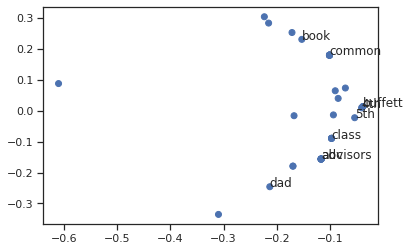

In [19]:
# Sudah siap untuk kita plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(x_kata, y_kata, c=['b']*len(x_kata))
for i, L in enumerate(Label):
    ax.annotate(L, (x_kata[i],y_kata[i]))

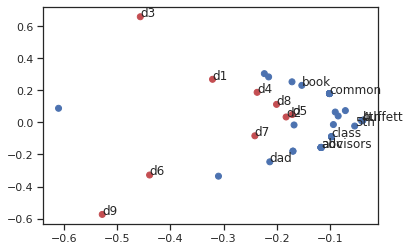

In [20]:
# Mari kita gabungkan plot Kata dan Dokumen
x_judul = U[:,0] # Kolom pertama matrix U = sumbu x judul
y_judul = U[:,1] # Kolom kedua matrix U = sumbu y judul

Label_judul = ['d1','d2','d3','d4','d5','d6','d7','d8','d9']

# Saatnya kita plot
# Mulai dari "Words" terlebih dahulu dengan warna biru "b"
fig, ax = plt.subplots()
ax.scatter(x_kata, y_kata, c=['b']*len(x_kata))
for i, L in enumerate(Label):
    ax.annotate(L, (x_kata[i],y_kata[i]))
    
# Lalu judul (dokumen) dengan warna Merah "r"
ax.scatter(x_judul, y_judul, c=['r']*len(x_judul))
for i, L in enumerate(Label_judul):
    ax.annotate(L, (x_judul[i],y_judul[i]))
# Analisa Plotnya .... misal perhatikan kata "dummies"

#**Case Study**
*The 20 Newsgroups data set is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups.*

Gunakan 20 Newsgroup data berikut ([Sumber Data](https://archive.ics.uci.edu/ml/datasets/Twenty+Newsgroups)). Bagaimana kita tahu topik apa yang dibicarakan dalam dokumen 20 Newsgroups tersebut? Mari lakukan implementasi *topic modelling* pada data tersebut.

In [31]:
# Load data
from sklearn.datasets import fetch_20newsgroups

dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data